In [37]:
# 공통적으로 사용할 모듈을 import
import time

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# E2-1. 손글씨 분류하기

- 1) 데이터 준비
- 2) 모델 학습
- 3) 성능 평가

## 1) 데이터 준비

In [2]:
# 데이터셋 불러오기
from sklearn.datasets import load_digits

digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

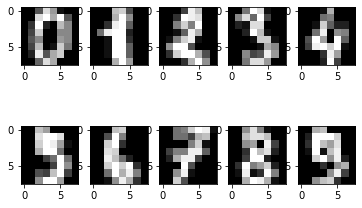

In [6]:
# 데이터 10개만 출력해보기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    
plt.show()

In [7]:
# train, test 데이터셋 나누기
digits_data = digits.data
digits_label = digits.target

X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=21)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1437, 64)
X_test: (360, 64)
y_train: (1437,)
y_test: (360,)


## 2) 모델 학습

- 의사결정트리DecisionTreeClassifier()
- 랜덤 포레스트 RandomForestClassifier()
- 서포트 벡터 머신 svm.SVC()
- 확률적 경사 하강 SGDClassifier()
- 로지스틱 회귀 LogisticRegression()

In [8]:
# 정확도를 저장할 딕셔너리 타입의 db 생성
digits_acc = {}

In [9]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
digits_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

In [10]:
print("Decision Tree Classifier\n")
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

Decision Tree Classifier

accuracy:  0.8472

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.80      0.85      0.82        41
           4       0.85      0.88      0.86        32
           5       0.90      0.93      0.91        46
           6       0.85      0.91      0.88        32
           7       0.93      0.93      0.93        40
           8       0.75      0.79      0.77        42
           9       0.63      0.76      0.69        29

    accuracy                           0.85       360
   macro avg       0.85      0.84      0.85       360
weighted avg       0.86      0.85      0.85       360



In [11]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
digits_acc['Random Forest'] = accuracy_score(y_test, y_pred)

In [12]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9750

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       1.00      0.98      0.99        41
           4       0.94      0.94      0.94        32
           5       0.98      1.00      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.95      0.98      0.96        42
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



In [13]:
# SVM(Support Vector Machine)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
digits_acc['SVM'] = accuracy_score(y_test, y_pred)

In [14]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9861

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [15]:
# SGD Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
digits_acc['SGD'] = accuracy_score(y_test, y_pred)

In [16]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9556

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.87      0.94      0.91        36
           2       1.00      1.00      1.00        30
           3       0.93      0.98      0.95        41
           4       0.97      1.00      0.98        32
           5       0.96      0.98      0.97        46
           6       0.97      1.00      0.98        32
           7       1.00      1.00      1.00        40
           8       0.90      0.88      0.89        42
           9       1.00      0.79      0.88        29

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.96       360
weighted avg       0.96      0.96      0.96       360



In [17]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
digits_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [19]:
print("정확도 accuracy 비교\n")
for k, v in digits_acc.items():
    print(f'{k:<20}: {v:.4f}')

정확도 accuracy 비교

Decision Tree       : 0.8472
Random Forest       : 0.9750
SVM                 : 0.9861
SGD                 : 0.9556
Logistic Regression : 0.9778


## 3. 성능 평가
#### 1) 정확도 accuracy 비교
- accuracy를 기준으로 SVM과 로지스틱 회귀 모델이 항상 가장 높고, 의사결정트리와 SGD 모델이 가장 낮았다.

#### 2) F1 score 비교
- F1 score도 마찬가지로 SVM이 가장 높고, 그 다음으로 로지스틱 회귀 모델이 높은 값을 보였다.

#### 3) Classification report 비교
- precision, recall, f1-score와 그 평균 값들을 종합적으로 보았을 때에도, SVM 모델이 가장 많이 1에 가까운 값들을 보였다.

### 결론
- 손으로 쓴 숫자가 무엇인지 정확하게 맞추는 것이 가장 중요하므로 정확도(accuracy)가 가장 중요한 지표이다.
- accuracy가 가장 높은 SVM 모델이 가장 성능이 좋다고 할 수 있다.

----

# E2-2. 와인 분류하기

- 1) 데이터 준비
- 2) 모델 학습
- 3) 성능 평가

## 1) 데이터 준비

In [20]:
# 데이터셋 불러오기
from sklearn.datasets import load_wine

wines = load_wine()
print(dir(wines))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [21]:
print(wines.target_names)

['class_0' 'class_1' 'class_2']


In [22]:
print(wines.data.shape)
print(wines.target.shape)

(178, 13)
(178,)


In [23]:
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
# train, test 데이터셋 나누기
wine_data = wines.data
wine_label = wines.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=56)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (142, 13)
X_test: (36, 13)
y_train: (142,)
y_test: (36,)


## 2) 모델 학습

- 의사결정트리DecisionTreeClassifier()
- 랜덤 포레스트 RandomForestClassifier()
- 서포트 벡터 머신 svm.SVC()
- 확률적 경사 하강 SGDClassifier()
- 로지스틱 회귀 LogisticRegression()

In [38]:
# 정확도를 저장할 딕셔너리 타입의 db 생성
wine_acc = {}

# 실행 속도를 저장할 딕셔너리 타입 db 생성
wine_time = {}

In [26]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
wine_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

In [27]:
print("Decision Tree Classifier\n")
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

Decision Tree Classifier

accuracy:  0.8611

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.80      0.80      0.80        10
           2       0.89      0.73      0.80        11

    accuracy                           0.86        36
   macro avg       0.86      0.84      0.85        36
weighted avg       0.86      0.86      0.86        36



In [39]:
# Random Forest Classifier
start = time.time()    # 실행 시간 측정을 위해 추가

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

total_time = time.time() - start
wine_time['Random Forest'] = total_time

wine_acc['Random Forest'] = accuracy_score(y_test, y_pred)

In [29]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [30]:
# SVM(Support Vector Machine)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
wine_acc['SVM'] = accuracy_score(y_test, y_pred)

In [31]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.6111

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# SGD Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
wine_acc['SGD'] = accuracy_score(y_test, y_pred)

In [33]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.5833

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.47      0.70      0.56        10
           2       0.33      0.27      0.30        11

    accuracy                           0.58        36
   macro avg       0.57      0.57      0.56        36
weighted avg       0.61      0.58      0.59        36



In [40]:
# Logistic Regression
start = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

total_time = time.time() - start
wine_time['Logistic Regression'] = total_time

wine_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [36]:
print("정확도 accuracy 비교\n")
for k, v in wine_acc.items():
    print(f'{k:<20}: {v:.4f}')

정확도 accuracy 비교

Decision Tree       : 0.8611
Random Forest       : 1.0000
SVM                 : 0.6111
SGD                 : 0.5833
Logistic Regression : 1.0000


In [43]:
print("학습 & 예측 시간 비교\n")
for k, v in wine_time.items():
    print(f'{k:<20}: {v:.4f}')

학습 & 예측 시간 비교

Random Forest       : 0.1555
Logistic Regression : 0.0317


## 3. 성능 평가
#### 1) 정확도 accuracy 비교
- 랜덤 포레스트와 로지스틱 회귀 모델의 정확도가 1.0으로 가장 높았다.

#### 2) F1 score 비교
- 랜덤 포레스트와 로지스틱 회귀 모델이 모든 클래스에 대해 1.0으로 가장 높게 나타났다.

#### 3) Classification report 비교
- 역시 랜덤 포레스트와 로지스틱 회귀 모델이 모든 값이 1.0으로 가장 높았다.

### 결론
- 어떤 와인인지 정확하게 맞추는 것이 중요한 문제이므 정확도(accuracy)가 가장 중요한 지표이다.
- 랜덤 포레스트와 로지스틱 회귀 모델이 성능 면에서 가장 우수하다.
- 그러나 학습 및 예측에 소요되는 시간을 비교한 결과, 랜덤 포레스트보다 로지스틱 회귀 모델이 훨씬 적었다.
- 성능과 리소스를 고려했을 때 로지스틱 회귀 모델을 선택하는 것이 가장 좋다.

----

# E2-3. 유방암 진단하기

- 1) 데이터 준비
- 2) 모델 학습
- 3) 성능 평가

## 1) 데이터 준비

In [69]:
# 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [70]:
print(cancer.target_names)

['malignant' 'benign']


In [71]:
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [72]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [73]:
# train, test 데이터셋 나누기
cancer_data = cancer.data
cancer_label = cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=98)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (455, 30)
X_test: (114, 30)
y_train: (455,)
y_test: (114,)


## 2) 모델 학습

- 의사결정트리DecisionTreeClassifier()
- 랜덤 포레스트 RandomForestClassifier()
- 서포트 벡터 머신 svm.SVC()
- 확률적 경사 하강 SGDClassifier()
- 로지스틱 회귀 LogisticRegression()

In [74]:
# 정확도를 저장할 딕셔너리 타입의 db 생성
cancer_acc = {}

In [75]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
cancer_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

In [76]:
print("Decision Tree Classifier\n")
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

Decision Tree Classifier

accuracy:  0.9298

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [77]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
cancer_acc['Random Forest'] = accuracy_score(y_test, y_pred)

In [78]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9474

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [79]:
# SVM(Support Vector Machine)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
cancer_acc['SVM'] = accuracy_score(y_test, y_pred)

In [80]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9386

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [81]:
# SGD Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
cancer_acc['SGD'] = accuracy_score(y_test, y_pred)

In [82]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9211

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        42
           1       0.97      0.90      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [83]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
cancer_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
print(f"accuracy: {accuracy_score(y_test, y_pred): .4f}\n")
print(classification_report(y_test, y_pred))

accuracy:  0.9386

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [85]:
print("정확도 accuracy 비교\n")
for k, v in cancer_acc.items():
    print(f'{k:<20}: {v:.4f}')

정확도 accuracy 비교

Decision Tree       : 0.9298
Random Forest       : 0.9474
SVM                 : 0.9386
SGD                 : 0.9211
Logistic Regression : 0.9386


## 3. 성능 평가
#### 1) 정확도 accuracy 비교
- 모델별 수치가 거의 비슷한데, 가장 높은 값은 랜덤 포레스트에서 나타났다.

#### 2) F1 score, Classification report 비교
- 모델별 수치가 거의 비슷한데, 가장 높은 값은 역시 랜덤 포레스트에서 나타났다.

### 결론
- 유방암 여부를 판단하는 문제에 있어 가장 중요한 것은, 암이 맞는데 아니라고 판단하지 않는 것이다.
- 즉 FN(False Negative) 값이 작은 것이 가장 중요하므로, **recall** 값이 큰 것을 기준으로 성능을 평가해야 한다.
- recall을 비롯해 다른 값들도 모두 가장 높게 나타난 랜덤 포레스트 모델이 가장 성능이 우수하다고 할 수 있다.

----